## PRODIGY INFOTECH ML INTERNSHIP

#### TASK 03: Dog Vs Cat using SVM.

SUBMITTED BY: Bhushan Deshmukh 

**SVM Model** : SVM (Support Vector Machine) is a powerful machine learning model used for classification and regression tasks. It finds the optimal hyperplane that separates the data points into different classes, maximizing the margin between the classes and minimizing the classification error.

In [29]:
import os
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tqdm import tqdm
import joblib
from sklearn.model_selection import GridSearchCV
import cv2
import seaborn as sns
import time
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [ ]:
import zipfile

with zipfile.ZipFile('train.zip', 'r') as zip:
    zip.extractall('dataset')

In [1]:
import zipfile

with zipfile.ZipFile('test1.zip', 'r') as zip:
    zip.extractall('dataset')

In [12]:
# dog = 1, cat = 0
train_images = os.listdir('dataset/train')
features = []
labels = []
image_size = (50, 50)

#Processing train images
for image in tqdm(train_images, desc="Processing Train Images"):
    if image[0:3] == 'cat' :
        label = 0
    else :
        label = 1
    image_read = cv2.imread('dataset/train'+"/"+image)
    image_resized = cv2.resize(image_read, image_size)
    image_normalized = image_resized / 255.0
    image_flatten = image_normalized.flatten()
    features.append(image_flatten)
    labels.append(label)

Processing Train Images: 100%|███████████████████████████████████████████████████| 25000/25000 [06:29<00:00, 64.12it/s]


In [14]:
del train_images

In [16]:
features = np.asarray(features)
labels = np.asarray(labels)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, shuffle=True, random_state=20)

In [17]:
del features
del labels

In [19]:
n_components = 0.8
pca = PCA(n_components=n_components)
svm = SVC()
pca = PCA(n_components=n_components, random_state=42)
pipeline = Pipeline([
    ('pca', pca),
    ('svm', svm)
])

In [20]:
param_grid = {
    'pca__n_components': [2, 1, 0.9, 0.8],
    'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
}

In [21]:
start_time = time.time()

grid_search = GridSearchCV(pipeline, param_grid, cv=3, verbose=4)
grid_search.fit(X_train, y_train)

end_time = time.time()

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END pca__n_components=2, svm__kernel=linear;, score=0.532 total time=  54.4s
[CV 2/3] END pca__n_components=2, svm__kernel=linear;, score=0.528 total time=  52.8s
[CV 3/3] END pca__n_components=2, svm__kernel=linear;, score=0.533 total time=  58.2s
[CV 1/3] END pca__n_components=2, svm__kernel=rbf;, score=0.568 total time=  52.1s
[CV 2/3] END pca__n_components=2, svm__kernel=rbf;, score=0.567 total time=  51.3s
[CV 3/3] END pca__n_components=2, svm__kernel=rbf;, score=0.569 total time=  49.6s
[CV 1/3] END pca__n_components=2, svm__kernel=poly;, score=0.494 total time=  34.5s
[CV 2/3] END pca__n_components=2, svm__kernel=poly;, score=0.500 total time=  34.1s
[CV 3/3] END pca__n_components=2, svm__kernel=poly;, score=0.486 total time=  32.8s
[CV 1/3] END pca__n_components=2, svm__kernel=sigmoid;, score=0.497 total time=  26.6s
[CV 2/3] END pca__n_components=2, svm__kernel=sigmoid;, score=0.498 total time=  25.6s
[CV 3/

In [22]:
del X_train
del y_train

In [23]:
best_pipeline = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_params)
print("Best Score: ", best_score)

Best Parameters:  {'pca__n_components': 0.9, 'svm__kernel': 'rbf'}
Best Score:  0.676200400901047


In [24]:
accuracy = best_pipeline.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6784


In [26]:
y_pred = best_pipeline.predict(X_test)

target_names = ['Cat', 'Dog']
classification_rep = classification_report(y_test, y_pred, target_names=target_names)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

         Cat       0.67      0.68      0.68      2479
         Dog       0.68      0.68      0.68      2521

    accuracy                           0.68      5000
   macro avg       0.68      0.68      0.68      5000
weighted avg       0.68      0.68      0.68      5000



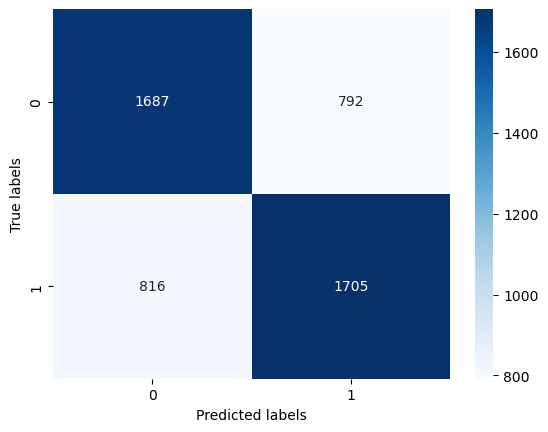

In [28]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()